In [72]:
import csv
import numpy as np
import os
import re

import matplotlib.pyplot as plt

from itertools import chain

In [3]:
results_path = "//store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/output/new_results/match_analysis"
files = [os.path.join(results_path, f) for f in os.listdir(results_path) if re.search(".csv$", f)]

dicts = {}

for filename in files:
    name = re.split(r"\\", filename)[1]
    with open(filename, "r") as f:
        dicts[name] = list(csv.DictReader(f))

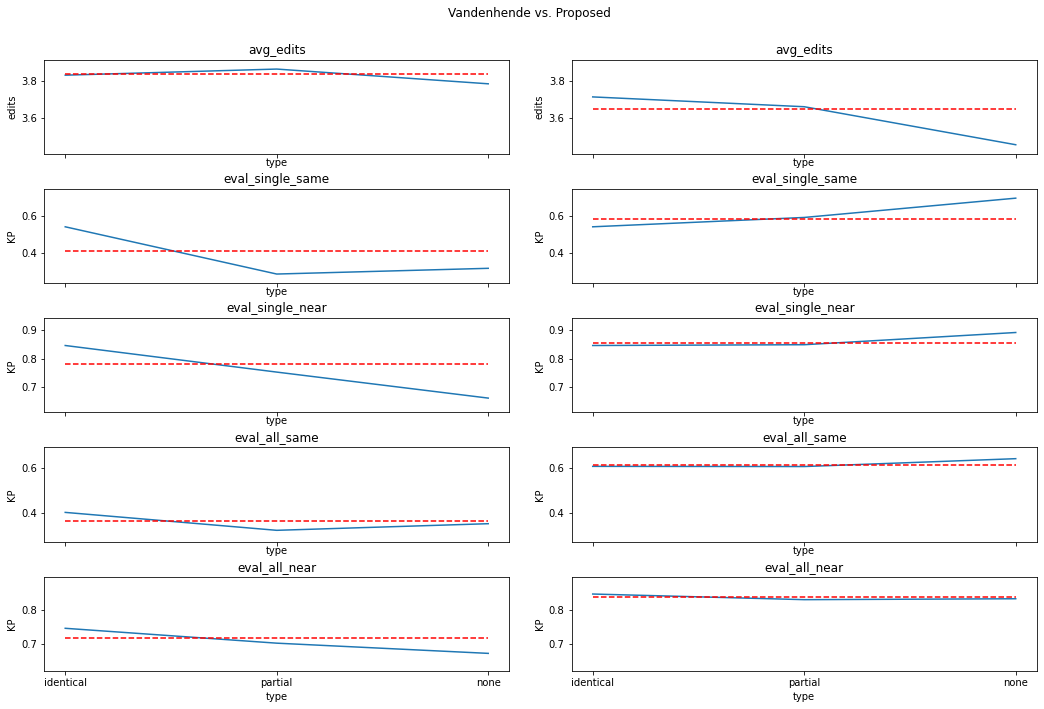

In [85]:
types = [d["type"] for d in list(dicts.values())[0]]
metrics = [k for k in (list(dicts.values())[0][0].keys()) if k != "type"]
fig, axs = plt.subplots(len(metrics), len(dicts), sharex=True)
fig.set_figwidth(15)
fig.set_figheight(10)
fig.suptitle("Vandenhende vs. Proposed")
fig.tight_layout(pad=2.5)
i = 0

x = [t for t in types if t != "any"]

limits = [list(chain.from_iterable([[float(dict[m]) for dict in d] for d in list(dicts.values())])) for m in metrics]
limits = [[min(l) - 0.05, max(l) + 0.05] for l in limits]

for name, value in dicts.items():
    y_dicts = [next(item for item in value if item["type"] == t) for t in x]
    for j in range(len(metrics)):
        metric = metrics[j]
        ax = axs[j, i]
        ax.set_title(metric)
        ax.set(xlabel="type", ylabel="edits" if metric == "avg_edits" else "KP")
        # ax.label_outer()

        y = [float(d[metric]) for d in y_dicts]

        ax.set_ylim(limits[j])
        ax.plot(x, y)
        any = np.empty(len(x))
        any.fill(next(item for item in value if item["type"] == "any")[metric])
        ax.plot(x, any, "r--")
    i += 1